# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [10]:
df = pd.read_pickle("../shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

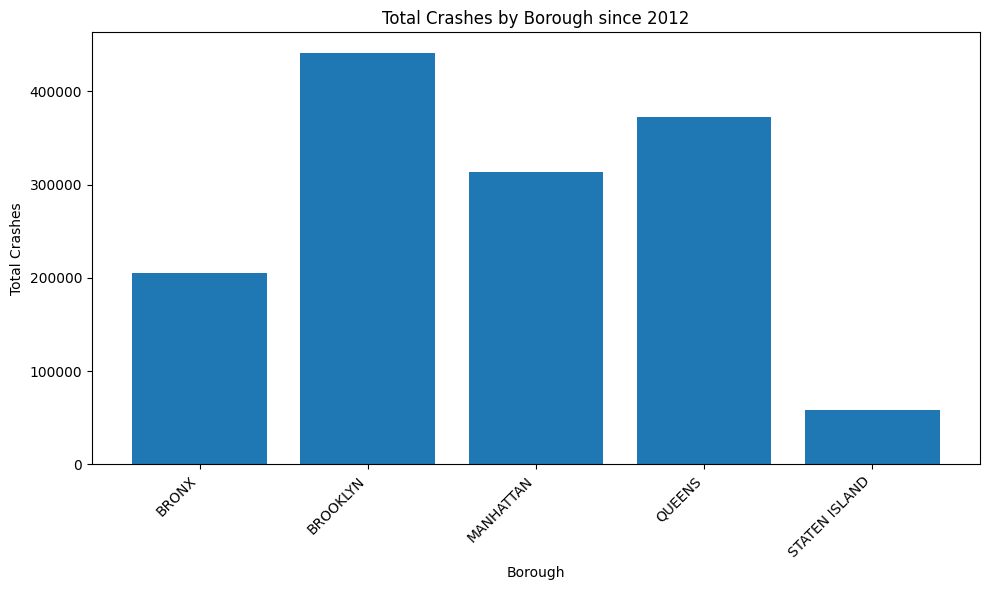

In [11]:
#Bar graph to show borough with maximum number of crashes

import matplotlib.pyplot as plt
# 4. Create a bar graph
borough_crash_totals = df.groupby('BOROUGH')['CRASH DATE_CRASH TIME'].count().reset_index()
borough_crash_totals
plt.figure(figsize=(10, 6))
plt.bar(borough_crash_totals['BOROUGH'], borough_crash_totals['CRASH DATE_CRASH TIME'])
plt.xlabel("Borough")
plt.ylabel("Total Crashes")
plt.title("Total Crashes by Borough since 2012")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the bar graph
plt.show()


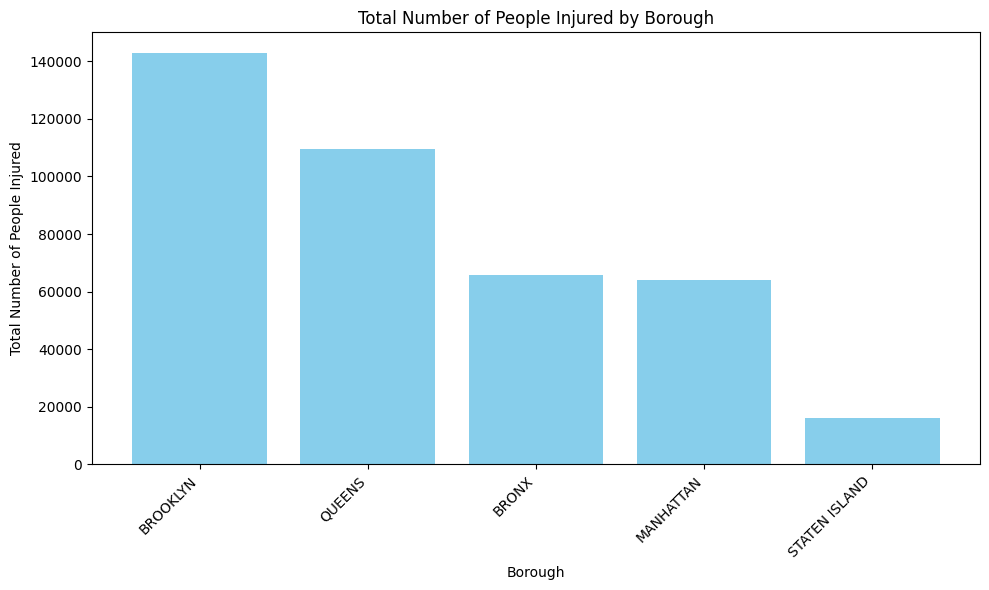

In [12]:
# Total number of people injured by Borough


# 1. Group data by borough and calculate the total number of people injured
borough_injured_totals = df.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].sum().reset_index()
borough_injured_totals = borough_injured_totals.sort_values(by='NUMBER OF PERSONS INJURED', ascending=False)

# 2. Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(borough_injured_totals['BOROUGH'], borough_injured_totals['NUMBER OF PERSONS INJURED'], color='skyblue')
plt.xlabel("Borough")
plt.ylabel("Total Number of People Injured")
plt.title("Total Number of People Injured by Borough")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the bar graph
plt.show()


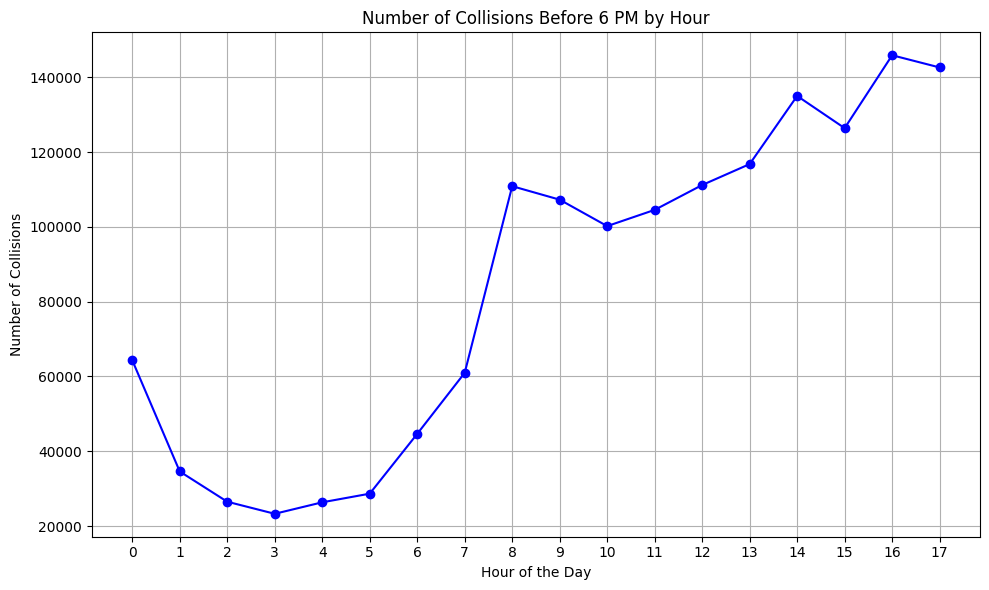

In [13]:
# Accidents before 6PM



# Convert the 'TIME' column to datetime
df['TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# 1. Filter data for collisions before 6 PM
collisions_before_6pm = df[df['CRASH DATE_CRASH TIME'].dt.hour < 18]

# 2. Group data by hour and calculate the count of collisions for each hour
hourly_collisions = collisions_before_6pm.groupby(collisions_before_6pm['CRASH DATE_CRASH TIME'].dt.hour)['CRASH DATE_CRASH TIME'].count()

# 3. Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_collisions.index, hourly_collisions.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions Before 6 PM by Hour")
plt.grid(True)
plt.xticks(range(0, 18))
plt.tight_layout()

# Show the line graph
plt.show()

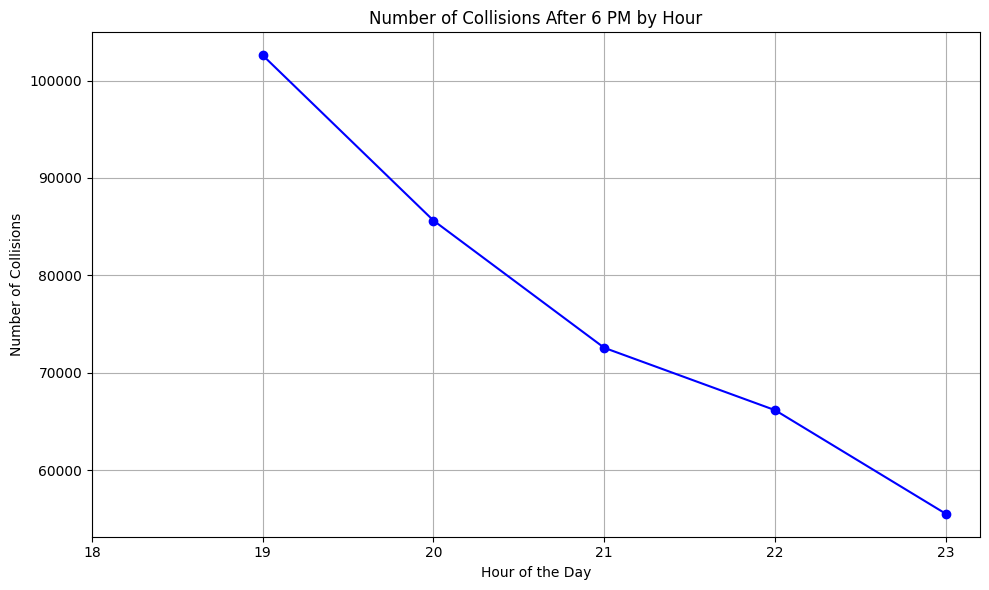

In [14]:
# Accidents after 6pm



# Convert the 'TIME' column to datetime
df['TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# 1. Filter data for collisions before 6 PM
collisions_after_6pm = df[df['CRASH DATE_CRASH TIME'].dt.hour > 18]


# 2. Group data by hour and calculate the count of collisions for each hour
hourly_collisions = collisions_after_6pm.groupby(collisions_after_6pm['TIME'].dt.hour)['TIME'].count()

# 3. Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_collisions.index, hourly_collisions.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions After 6 PM by Hour")
plt.grid(True)
plt.xticks(range(18, 24))
plt.tight_layout()

# Show the line graph
plt.show()


## Borough with the maximum number of crashes reported since 2012

In [15]:
borough_crash_totals = df.groupby('BOROUGH')['CRASH DATE_CRASH TIME'].count().reset_index()
borough_crash_totals

,BOROUGH,CRASH DATE_CRASH TIME
0,BRONX,205345
1,BROOKLYN,441026
2,MANHATTAN,313266
3,QUEENS,372457
4,STATEN ISLAND,58297


## Borough with the maximum number of crashes adjusted for population

In [16]:
# Load the population data (use the provided values)
population_data = pd.DataFrame({
    'BOROUGH': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'Population': [1446788, 2648452, 1638281, 2330295, 487155]
})
population_data

,BOROUGH,Population
0,Bronx,1446788
1,Brooklyn,2648452
2,Manhattan,1638281
3,Queens,2330295
4,Staten Island,487155


In [ ]:
# Merge the crash data with the population data based on the 'Borough' column
merged_data = pd.merge(df, population_data, on='BOROUGH')
merged_data
merged_data['DATE'] = pd.to_datetime(merged_data['CRASH DATE_CRASH TIME'])
filtered_data = merged_data[merged_data['CRASH DATE_CRASH TIME'].dt.year >= 2012]
# Group data by borough and calculate the total number of crashes
borough_crash_totals = filtered_data.groupby('BOROUGH')['CRASH DATE_CRASH TIME'].count().reset_index()
borough_crash_totals = borough_crash_totals.rename(columns={'CRASH DATE_CRASH TIME': 'Total Crashes'})
borough_crash_totals
# Calculate crashes per 100,000 people
borough_crash_totals['Crashes per 100,000 People'] = (borough_crash_totals['Total Crashes'] / borough_crash_totals['Population']) * 100000

## Analyzing the leading cause of crashes

In [18]:
import pandas as pd

# Load the crash data
crash_data = pd.read_pickle("../shared/Motor_Vehicle_Collisions_-_Crashes.pkl")

crash_data

# 1. Filter rows with 'Unspecified'
filtered_data = crash_data[crash_data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# 2. Calculate the leading cause
leading_cause = filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].mode().values[0]

# 3. Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(filtered_data)
accidents_with_leading_cause = len(filtered_data[filtered_data['CONTRIBUTING FACTOR VEHICLE 1'] == leading_cause])
proportion = accidents_with_leading_cause / total_accidents

print("Leading Cause of Crashes:", leading_cause)
print("Proportion of Accidents Attributable to Leading Cause:", proportion)

Leading Cause of Crashes: Driver Inattention/Distraction
Proportion of Accidents Attributable to Leading Cause: 0.3027229539746618


## Top 3 causes of crashes 

In [19]:
# 1. Filter rows with 'Unspecified'
filtered_data = crash_data[crash_data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# 2. Calculate the top 3 causes (ignoring 'Unspecified')
top_3_causes = filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3).index.tolist()

# 3. Calculate the proportion of total crashes accounted for by the top 3 causes
total_accidents = len(filtered_data)
accidents_with_top_3_causes = len(filtered_data[filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_3_causes)])
proportion = accidents_with_top_3_causes / total_accidents

print("Top 3 Causes of Crashes (Ignoring 'Unspecified'):", top_3_causes)
print("Proportion of Total Crashes Accounted for by Top 3 Causes:", proportion)

Top 3 Causes of Crashes (Ignoring 'Unspecified'): ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely']
Proportion of Total Crashes Accounted for by Top 3 Causes: 0.4737010461641528


## Analyzing fatalities

In [20]:
# Convert the 'DATE' column to datetime
crash_data['CRASH DATE_CRASH TIME'] = pd.to_datetime(crash_data['CRASH DATE_CRASH TIME'])

# 1. Filter data for accidents since 2012
filtered_data = crash_data[crash_data['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# 2. Identify accidents with at least one fatality
fatal_accidents = filtered_data[filtered_data['NUMBER OF PERSONS KILLED'] >= 1]

# Get the total count of fatal accidents
total_fatal_accidents = len(fatal_accidents)

print("Total Count of Accidents Involving at Least One Fatality since 2012:", total_fatal_accidents)

Total Count of Accidents Involving at Least One Fatality since 2012: 2804


## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [21]:
# Convert the 'DATE' column to datetime
crash_data['CRASH DATE_CRASH TIME'] = pd.to_datetime(crash_data['CRASH DATE_CRASH TIME'])

# 1. Filter data for accidents since 2012
filtered_data = crash_data[crash_data['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# 2. Count accidents with 1 or more deaths
fatal_accidents = filtered_data[filtered_data['NUMBER OF PERSONS KILLED'] >= 1]
count_fatal_accidents = len(fatal_accidents)

# 3. Calculate the average per 1000 accidents
total_accidents = len(filtered_data)
average_per_1000_accidents = (count_fatal_accidents / total_accidents) * 1000

print("On Average, for Every 1000 Accidents, How Many Have Resulted in at Least One Person Dead:", average_per_1000_accidents)


On Average, for Every 1000 Accidents, How Many Have Resulted in at Least One Person Dead: 1.3893258747079764


## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [22]:
# 1. Check for missing Borough codes
missing_borough_count = crash_data['BOROUGH'].isna().sum()

# 2. Calculate the proportion of accidents without a Borough code
total_accidents = len(crash_data)
proportion_missing_borough = missing_borough_count / total_accidents

print("Proportion of Accidents without a Borough Code:", proportion_missing_borough)


Proportion of Accidents without a Borough Code: 0.3110890897784957


## Which combinations of vehicles have the most number of accidents

In [23]:
# Drop rows where either 'VEHICLE TYPE CODE 1' or 'VEHICLE TYPE CODE 2' is missing
crash_data.dropna(subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'], inplace=True)

# Create a new column 'Vehicle Combination' to represent the combination of two vehicles
crash_data['Vehicle Combination'] = crash_data['VEHICLE TYPE CODE 1'] + ' + ' + crash_data['VEHICLE TYPE CODE 2']

# Find the combination of vehicles with the most accidents
most_common_combination = crash_data['Vehicle Combination'].mode().values[0]
most_common_combination_count = crash_data['Vehicle Combination'].value_counts().max()

print("Combination of Vehicles with the Most Accidents:", most_common_combination)
print("Number of Accidents Involving this Combination:", most_common_combination_count)


Combination of Vehicles with the Most Accidents: Sedan + Sedan
Number of Accidents Involving this Combination: 197944


***  
## Finished